# Data Preprocessing and Exploration

In [34]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

# Preprocessing

### Loading the IRIS Dataset

In [35]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

### Checking Missing Values

In [36]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### Normalization

In [37]:
scaler = MinMaxScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

### Label Encoding

In [38]:
# Display unique values in the species column
print("Unique species values:", df['species'].unique())

# Get value counts of each species
print("\nValue counts for each species:")
print(df['species'].value_counts())

# You can also check the original target values
print("\nOriginal target values (encoded):", np.unique(iris.target))
print("Target names:", iris.target_names)

# Create a mapping dictionary for reference
species_mapping = dict(zip(iris.target_names, np.unique(iris.target)))
print("\nSpecies mapping (name to encoded value):")
print(species_mapping)

Unique species values: ['setosa' 'versicolor' 'virginica']

Value counts for each species:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Original target values (encoded): [0 1 2]
Target names: ['setosa' 'versicolor' 'virginica']

Species mapping (name to encoded value):
{'setosa': 0, 'versicolor': 1, 'virginica': 2}


No need for Label encoding as it is already done for each species

# Exploration

### Summary Statistics

In [39]:
print("\nStatistics:\n", df.describe())


Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


# Visualizations

### pVisualization 1: Pairplot

/Users/hokage/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


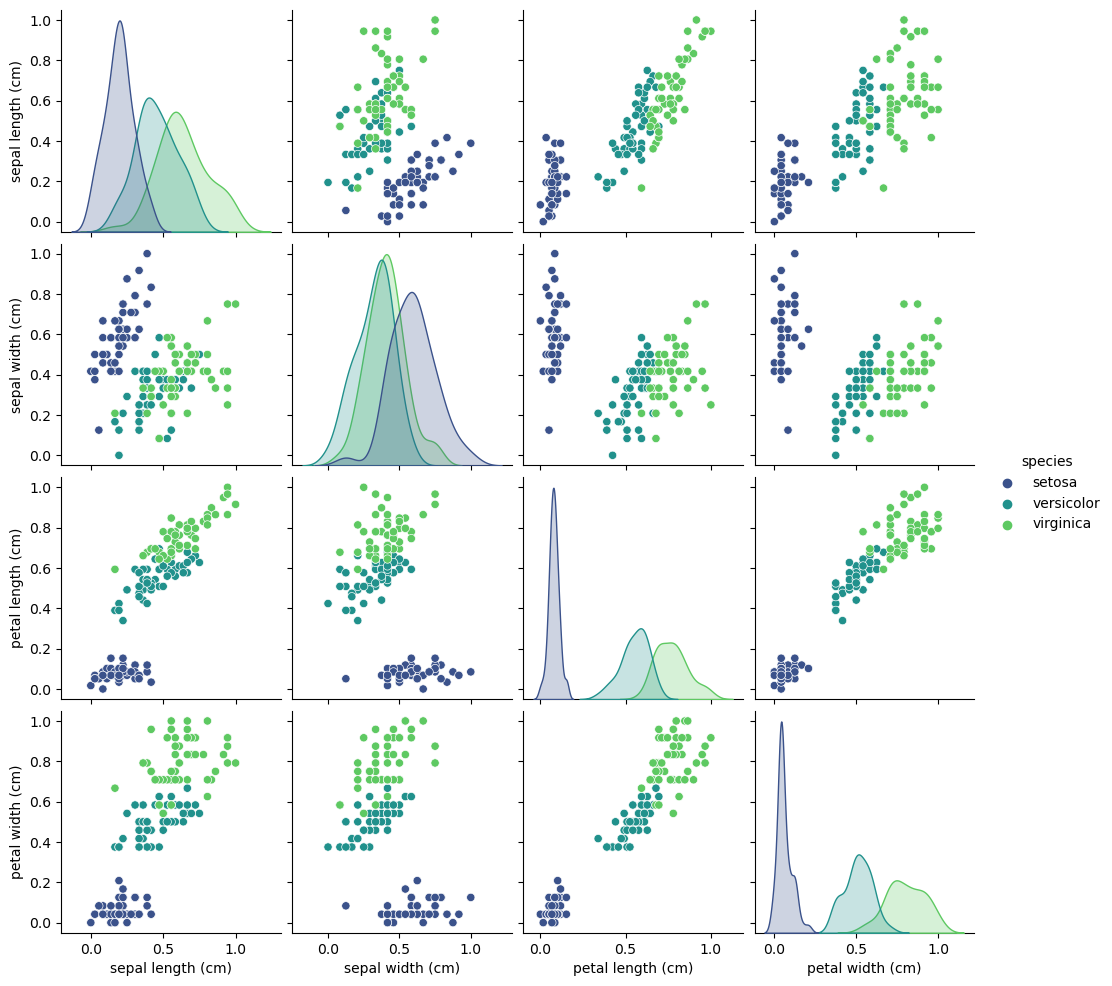

In [40]:
sns.pairplot(df, hue='species', palette='viridis')
plt.savefig('iris_pairplot.png')
plt.show()

### Visualization 2: Heatmap

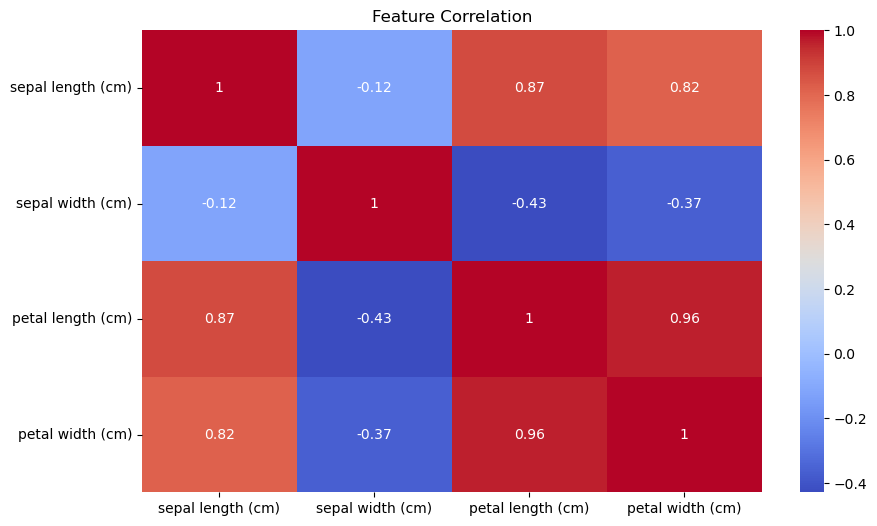

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('iris_heatmap.png')
plt.show()

### Visualization 3: Boxplots

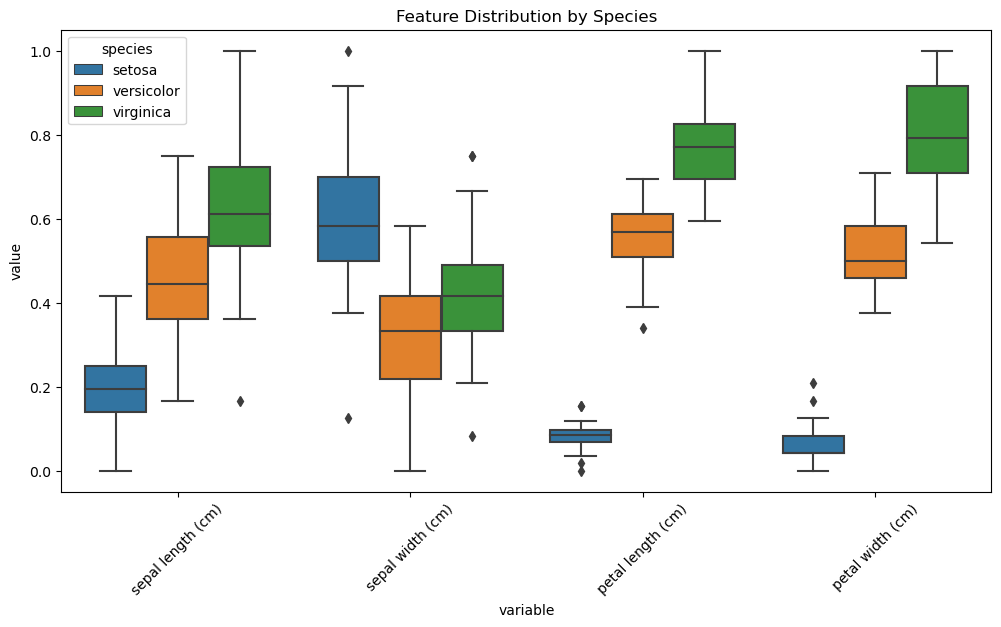

In [42]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='species')
sns.boxplot(data=df_melted, x='variable', y='value', hue='species')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')
plt.savefig('iris_boxplots.png')
plt.show()

# Train-test Split Funtion

In [43]:
def split_data(data, target_col, test_size=0.2, random_state=42):
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

X_train, X_test, y_train, y_test = split_data(df, 'species')
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 120, Test size: 30


# Saving Preprocessed Data

In [44]:
# Create directory if needed
output_dir = Path('preprocessed_data')
output_dir.mkdir(exist_ok=True)

# Save as CSV (human-readable)
csv_path = output_dir / 'iris_processed.csv'
df.to_csv(csv_path, index=False)
print(f"Saved processed data to {csv_path}")

# Verify files
print("\nDirectory contents:")
print(*[f"• {f.name}" for f in output_dir.glob('*')], sep='\n')

Saved processed data to preprocessed_data/iris_processed.csv

Directory contents:
• iris_processed.csv
